# Импорт библиотек

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Dataset №1

<function matplotlib.pyplot.show(close=None, block=None)>

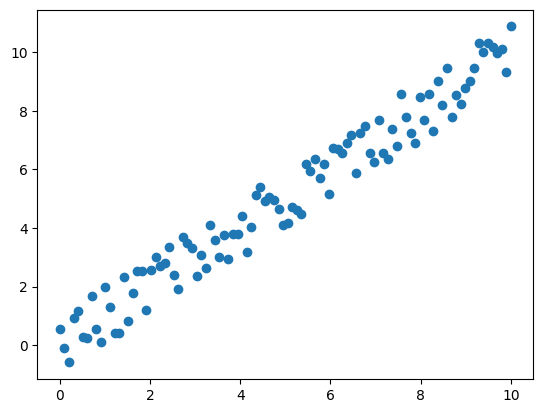

In [18]:
x = np.linspace(0,10,100)
y = x +np.random.random(100)*2-1
plt.scatter(x, y)
plt.show

# Dataset №2

<function matplotlib.pyplot.show(close=None, block=None)>

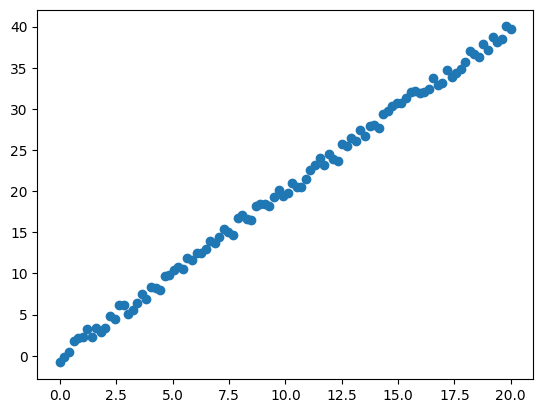

In [122]:
xs2 = np.linspace(0,20,100)
ys2= 2*xs2 +np.random.random(100)*2-1
plt.scatter(xs2, ys2)
plt.show

# Dataset №3

<function matplotlib.pyplot.show(close=None, block=None)>

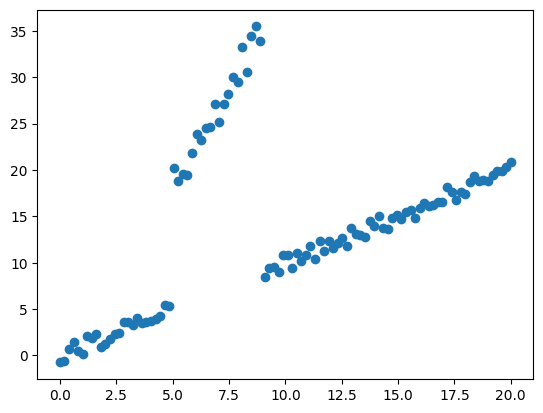

In [20]:
xs3 = np.linspace(0,20,100)
ys3 = xs3 +np.random.random(100)*2-1
ys3[25:45] *=4
plt.scatter(xs3, ys3)
plt.show

# Dataset №4

<function matplotlib.pyplot.show(close=None, block=None)>

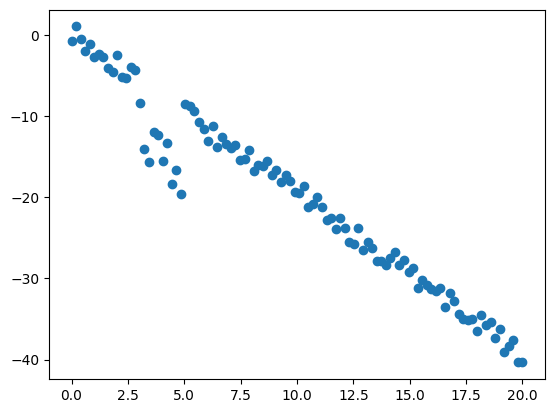

In [139]:
xs4 = np.linspace(0,20,100)
ys4 = -2*xs4 +np.random.random(100)*3-1
ys4[15:25] *=2
plt.scatter(xs4, ys4)
plt.show

# Linear Regression

In [21]:
x_train = x.reshape(-1, 1)
y_train = y.reshape(-1, 1)

разделим данные на обучающие и тестовые

In [22]:
x_train, x_test, y_train, y_test= train_test_split(x_train, y_train, test_size=0.5, random_state=42)

создадим модель

In [23]:
model = LinearRegression()

In [24]:
linear_model=model.fit(x_train, y_train)
linear_model

LinearRegression()

In [25]:
r2_train = model.score(x_train,y_train)
r2_test = model.score(x_test,y_test)

In [26]:
print('coefficient of determination:', r2_train)

coefficient of determination: 0.9510579199367719


In [27]:
print('coefficient of determination:', r2_test)

coefficient of determination: 0.9583593760588343


In [28]:
print('intercept:', model.intercept_)

intercept: [0.14002057]


In [29]:
print('slope:', model.coef_)

slope: [[0.98769018]]


In [30]:
y_pred = linear_model.predict(x_train)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 2.53442101]
 [ 0.43932062]
 [ 1.83605422]
 [ 3.93115461]
 [ 0.93815405]
 [ 7.92182202]
 [ 0.73862068]
 [ 6.52508842]
 [ 3.73162124]
 [ 9.01925555]
 [ 5.72695494]
 [10.01692241]
 [ 5.52742157]
 [ 4.42998803]
 [ 5.12835483]
 [ 6.82438848]
 [ 4.72928809]
 [ 6.92415516]
 [ 6.22578837]
 [ 9.81738904]
 [ 8.0215887 ]
 [ 4.23045466]
 [ 5.92648831]
 [ 4.92882146]
 [ 9.91715572]
 [ 5.82672163]
 [ 7.62252196]
 [ 3.3325545 ]
 [ 9.51808898]
 [ 6.026255  ]
 [ 6.42532174]
 [ 8.52042213]
 [ 3.83138792]
 [ 3.03325444]
 [ 0.23978725]
 [ 5.3278882 ]
 [ 2.23512096]
 [ 0.33955394]
 [ 2.43465433]
 [ 8.81972218]
 [ 9.21878892]
 [ 7.52275528]
 [ 8.7199555 ]
 [ 8.32088876]
 [ 2.13535427]
 [ 6.12602168]
 [ 7.22345522]
 [ 1.53675416]
 [ 9.31855561]
 [ 5.22812152]]


In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
print('Train MSE: ', mean_squared_error(y_train, y_pred))

Train MSE:  0.41245566783603604


In [106]:
import pickle

In [107]:
with open('myfile.pkl', 'wb') as output:
    pickle.dump(linear_model, output)

In [108]:
with open('myfile.pkl', 'rb') as f:
  data_new = pickle.load(f)

In [109]:
result = data_new.score(x_test, y_test)
print(result)

0.9583593760588343


# Test model

In [110]:
from joblib import load, dump
import numpy as np
from os import path
import sklearn
from sklearn.model_selection import train_test_split
import pytest
import math

In [119]:
%%writefile test_2.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def linear_model():
  with open('myfile.pkl', 'rb') as f:
    linear_model = pickle.load(f)
  return linear_model

def test_2(linear_model):
  xs2 = np.linspace(0,20,100)
  ys2= 2*xs2 +np.random.random(100)*2-1
  pred2 = linear_model.predict(xs2.reshape(-1,1))
  mse2 = mse(ys2, pred2)
  r2= r2_score(ys2, pred2)
  assert mse2 > 0
  assert r2 > -1

Overwriting test_2.py


In [120]:
!cat test_2.py

import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def linear_model():
  with open('myfile.pkl', 'rb') as f:
    linear_model = pickle.load(f)
  return linear_model

def test_2(linear_model):
  xs2 = np.linspace(0,20,100)
  ys2= 2*xs2 +np.random.random(100)*2-1
  pred2 = linear_model.predict(xs2.reshape(-1,1))
  mse2 = mse(ys2, pred2)
  r2= r2_score(ys2, pred2)
  assert mse2 > 0
  assert r2 > -1


In [121]:
!pytest -v test_2.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: regressions-2.4.2, datadir-1.4.1, anyio-3.6.2
collected 1 item                                                               

test_2.py::test_2 PASSED                                                 [100%]

============================== 1 passed in 0.92s ===============================


In [126]:
%%writefile test_3.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def linear_model():
  with open('myfile.pkl', 'rb') as f:
    linear_model = pickle.load(f)
  return linear_model

def test_3(linear_model):
  xs3 = np.linspace(0,20,100)
  ys3 = xs3 +np.random.random(100)*2-1
  ys3[25:45] *=4
  pred3 = linear_model.predict(xs3.reshape(-1,1))
  mse3 = mse(ys3, pred3)
  r3= r2_score(ys3, pred3)
  assert mse3 > 0
  assert r3 > -1

Overwriting test_3.py


In [127]:
!cat test_3.py

import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def linear_model():
  with open('myfile.pkl', 'rb') as f:
    linear_model = pickle.load(f)
  return linear_model

def test_3(linear_model):
  xs3 = np.linspace(0,20,100)
  ys3 = xs3 +np.random.random(100)*2-1
  ys3[25:45] *=4
  pred3 = linear_model.predict(xs3.reshape(-1,1))
  mse3 = mse(ys3, pred3)
  r3= r2_score(ys3, pred3)
  assert mse3 > 0
  assert r3 > -1


In [128]:
!pytest -v test_3.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: regressions-2.4.2, datadir-1.4.1, anyio-3.6.2
collected 1 item                                                               

test_3.py::test_3 PASSED                                                 [100%]

============================== 1 passed in 0.67s ===============================


In [ ]:
xs4 = np.linspace(0,20,100)
ys4 = -1*xs4 +np.random.random(100)*2-1
ys4[15:45] *=4

In [136]:
%%writefile test_4.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def linear_model():
  with open('myfile.pkl', 'rb') as f:
    linear_model = pickle.load(f)
  return linear_model

def test_4(linear_model):
  xs4 = np.linspace(0,20,100)
  ys4 = -2*xs4 +np.random.random(100)*3-1
  ys4[15:25] *=2
  pred4 = linear_model.predict(xs4.reshape(-1,1))
  mse4 = mse(ys4, pred4)
  r4= r2_score(ys4, pred4)
  assert mse4 > 0
  assert r4 > -1

Overwriting test_4.py


In [137]:
!cat test_4.py

import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def linear_model():
  with open('myfile.pkl', 'rb') as f:
    linear_model = pickle.load(f)
  return linear_model

def test_4(linear_model):
  xs4 = np.linspace(0,20,100)
  ys4 = -2*xs4 +np.random.random(100)*3-1
  ys4[15:25] *=2
  pred4 = linear_model.predict(xs4.reshape(-1,1))
  mse4 = mse(ys4, pred4)
  r4= r2_score(ys4, pred4)
  assert mse4 > 0
  assert r4 > -1


In [138]:
!pytest -v test_4.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: regressions-2.4.2, datadir-1.4.1, anyio-3.6.2
collected 1 item                                                               

test_4.py::test_4 FAILED                                                 [100%]

=================================== FAILURES ===================================
____________________________________ test_4 ____________________________________

linear_model = LinearRegression()

    def test_4(linear_model):
      xs4 = np.linspace(0,20,100)
      ys4 = -2*xs4 +np.random.random(100)*3-1
      ys4[15:25] *=2
      pred4 = linear_model.predict(xs4.reshape(-1,1))
      mse4 = mse(ys4, pred4)
      r4= r2_score(ys4, pred4)
      assert mse4 > 0
>     assert r4 > -1
E     assert -8.537786699825617 > -1

test_4.py:20: AssertionError
==========================

In [142]:
pred4 = linear_model.predict(xs4.reshape(-1,1))
mse4 = mse(ys4, pred4)
r4= r2_score(ys4, pred4)
print('MSE: ', mse4)
print('r2_score: ', r4)

MSE:  1194.2812958432194
r2_score:  -8.75491646076854


ошибка в test4: r2_score= -8,75